Test interpolate_multi_object_data


project = []

EVENT_TYPE = 'SlideAround'

SESSION_NAMES = ['Session1', 'Session2']

for session_name in SESSION_NAMES:

    ### First load the session data
    session = load_one_param_file(os.path.join( DATA_DIR, EVENT_TYPE, session_name, 'files.param'))

    ### Turn all cube objects into 2D
    #### This action add data into session 
    #### session_data[SESSION_OBJ_2D]
    project_to2d(session, from_frame = 0, to_frame = session[SESSION_LEN])

    ### Interpolate object_2d
    #### session_data[SESSION_OBJ_2D] is interpolated
    interpolate_multi_object_data( session, object_names = object_2d.keys() )

    project.append(session)

### You can visualize the session now with
animate_event(session, event_index = 0)

### This function needs the whole project
down_sample_quotient = get_down_sample_quotient(project)

speed = get_action_speed(project, down_sample_quotient)

### This function actually removes session_data[SESSION_OBJECTS]
down_sampled_project = down_sample(project, down_sample_quotient)

### This will add session_data[SESSION_FEAT]
for session in down_sampled_project:
    qsr_feature_extractor(session, get_location_objects = get_location_objects_most_active)
    
turn_to_intermediate_data( project_data, 13, 20, 5)

In [1]:
import numpy as np
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from simulator.utils import Cube2D, Transform2D


In [2]:
from utils import SESSION_NAME, SESSION_OBJ_2D, SESSION_OBJECTS, SESSION_EVENTS, SESSION_LEN, SESSION_FEAT,\
            START, END, LABEL

In [90]:
session = {}
session[SESSION_NAME] = 'Session 1'
session[SESSION_LEN] = 100

session[SESSION_OBJ_2D] = {}
session[SESSION_OBJ_2D]['Stella Artois'] = {}
session[SESSION_OBJ_2D]['Shell'] = {}

session[SESSION_OBJ_2D]['Stella Artois'][20] = Cube2D(transform = Transform2D([0.0, 1.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][30] = Cube2D(transform = Transform2D([1.0, 1.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][50] = Cube2D(transform = Transform2D([1.0, 0.0], 0.1, 0.09))
session[SESSION_OBJ_2D]['Stella Artois'][60] = Cube2D(transform = Transform2D([0.0, 0.0], 0.1, 0.09))

session[SESSION_OBJ_2D]['Shell'][60] = Cube2D(transform = Transform2D([0.5, 0.5], 0.1, 0.09))
session[SESSION_OBJ_2D]['Shell'][70] = Cube2D(transform = Transform2D([0.5, -0.5], 0.1, 0.09))
session[SESSION_OBJ_2D]['Shell'][80] = Cube2D(transform = Transform2D([-0.5, -0.5], 0.1, 0.09))
session[SESSION_OBJ_2D]['Shell'][90] = Cube2D(transform = Transform2D([-0.5, 0.5], 0.1, 0.09))


session[SESSION_EVENTS] = [ {START: 20, END:60, LABEL:['Stella Artois', 'Shell']},
                          {START: 60, END:100, LABEL:['Shell', 'Stella Artois']}]

In [91]:
session

{'session_events': [{'end': 60,
   'label': ['Stella Artois', 'Shell'],
   'start': 20},
  {'end': 100, 'label': ['Shell', 'Stella Artois'], 'start': 60}],
 'session_length': 100,
 'session_name': 'Session 1',
 'session_obj_2d': {'Shell': {60: <simulator.utils.Cube2D at 0x193a0b74e48>,
   70: <simulator.utils.Cube2D at 0x193a0b74278>,
   80: <simulator.utils.Cube2D at 0x193a0b740b8>,
   90: <simulator.utils.Cube2D at 0x193a0b74e80>},
  'Stella Artois': {20: <simulator.utils.Cube2D at 0x193a0b74ac8>,
   30: <simulator.utils.Cube2D at 0x193a0b74860>,
   50: <simulator.utils.Cube2D at 0x193a0b74400>,
   60: <simulator.utils.Cube2D at 0x193a0b74160>}}}

In [80]:
import importlib
import session_util
from session_util import interpolate_multi_object_data
importlib.reload(session_util)


In [92]:
interpolate_multi_object_data(session, object_names = session[SESSION_OBJ_2D].keys())

In [13]:
from visualizer import animate_event

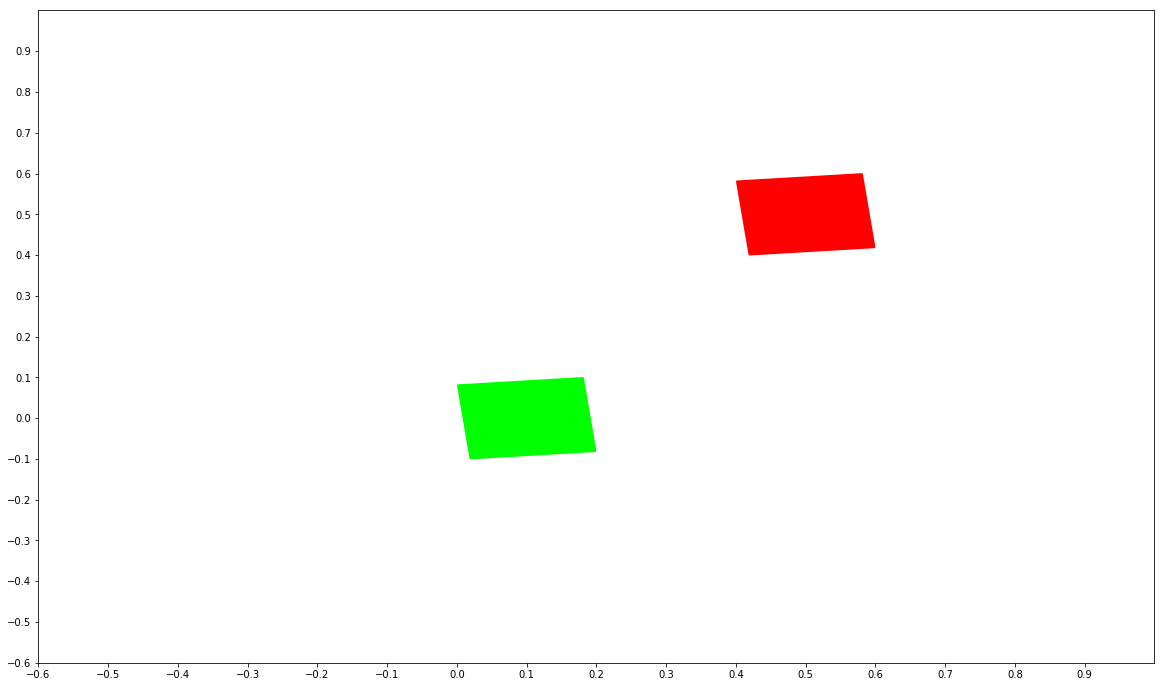

In [81]:
animate_event(session, 0)

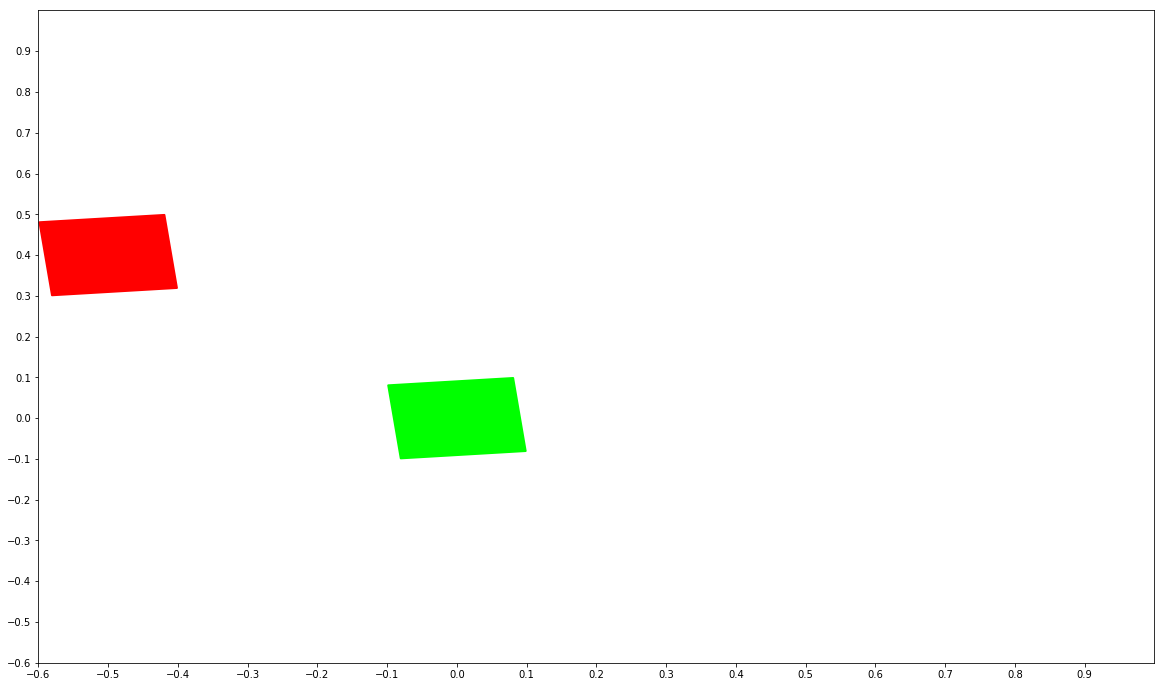

In [82]:
animate_event(session, 1)

In [93]:
project = [session]
down_sample_quotient = session_util.get_down_sample_quotient(project)
print(down_sample_quotient)

speed = session_util.get_action_speed(project, down_sample_quotient)
print (speed)

2
0.145


In [94]:
down_sampled_project = session_util.down_sample(project, down_sample_quotient)

In [43]:
import visualizer
importlib.reload(visualizer)

<module 'visualizer' from 'D:\\git\\learn-to-perform\\visualizer.py'>

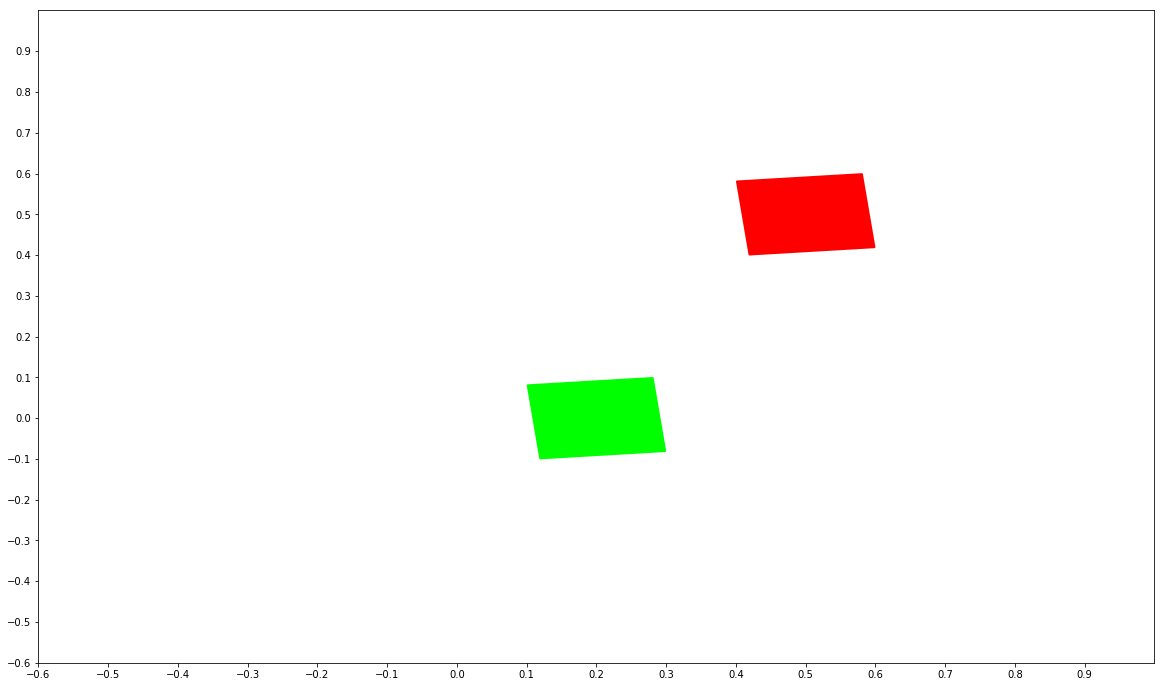

In [42]:
visualizer.animate_event(down_sampled_project[0], 0, name = "downsample_event.mp4")

In [72]:
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)

importlib.reload(session_util)
importlib.reload(feature_util)

(50, 6)
shape of diff_feature_chain (50, 8)


In [107]:
importlib.reload(feature_util)
for session in down_sampled_project:
    session[SESSION_LEN] = int(session[SESSION_LEN])
    feature_util.qsr_feature_extractor(session, get_location_objects = feature_util.get_location_objects_most_active)

start = 0 ; object_1_name = Shell ; object_2_name = Stella Artois
start = 5 ; object_1_name = Shell ; object_2_name = Stella Artois
start = 10 ; object_1_name = Stella Artois ; object_2_name = Shell
start = 15 ; object_1_name = Stella Artois ; object_2_name = Shell
start = 20 ; object_1_name = Stella Artois ; object_2_name = Shell
start = 25 ; object_1_name = Stella Artois ; object_2_name = Shell
start = 30 ; object_1_name = Shell ; object_2_name = Stella Artois
start = 35 ; object_1_name = Shell ; object_2_name = Stella Artois
start = 40 ; object_1_name = Shell ; object_2_name = Stella Artois
start = 45 ; object_1_name = Shell ; object_2_name = Stella Artois
(50, 6)
shape of diff_feature_chain (50, 8)


In [96]:
for session in down_sampled_project:
    print (session[SESSION_FEAT])

[[ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 5.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  8. -4.  0. -1. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  7.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  6. -1. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  6.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 7.  7.  7.  1.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 7.  8.  0.  1.  1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 7.  8.  0.  0. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 7.  7.  0. -1. -1.  0. -1.  0.  0.  0.  0.  0.  0.]
 [ 6.  6. 

In [97]:
import generate_util

In [106]:
importlib.reload(generate_util)
generate_util.turn_to_intermediate_data(down_sampled_project, 13, 20, 5)

Total number of samples7


(array([[[ 5.,  8.,  0., ...,  0.,  0.,  0.],
         [ 5.,  8.,  0., ...,  0.,  0.,  0.],
         [ 5.,  8.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 7.,  7.,  0., ...,  0.,  0.,  0.],
         [ 6.,  6., -1., ...,  0.,  0.,  0.],
         [ 6.,  6.,  0., ...,  0.,  0.,  0.]],
 
        [[ 5.,  8.,  0., ...,  0.,  0.,  0.],
         [ 5.,  8.,  0., ...,  0.,  0.,  0.],
         [ 5.,  8.,  0., ...,  0.,  0.,  0.],
         ..., 
         [ 6.,  6.,  0., ...,  0.,  0.,  0.],
         [ 5.,  7., -1., ...,  0.,  0.,  0.],
         [ 5.,  8.,  0., ...,  0.,  0.,  0.]],
 
        [[ 1.,  8., -4., ...,  0.,  0.,  0.],
         [ 1.,  7.,  0., ...,  0.,  0.,  0.],
         [ 0.,  6., -1., ...,  0.,  0.,  0.],
         ..., 
         [ 4.,  6., -1., ...,  0.,  0.,  0.],
         [ 4.,  6.,  0., ...,  0.,  0.,  0.],
         [ 3.,  7., -1., ...,  0.,  0.,  0.]],
 
        ..., 
        [[ 6.,  6.,  0., ...,  0.,  0.,  0.],
         [ 6.,  6.,  0., ...,  0.,  0.,  0.],
         [ 6